In [51]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

#m = GEKKO()
nr_points = 101
m = GEKKO()
m.time = np.linspace(0,1,nr_points) # scale 0-1 time with tf
# options
m.options.NODES = 6
m.options.SOLVER = 3
m.options.IMODE = 6
m.options.MAX_ITER = 500
m.options.MV_TYPE = 0
m.options.DIAGLEVEL = 0


p = np.zeros(nt)
p[-1] = 1.0
p_less_10 = np.ones(nt) * 10
p_less_10[-1] = 0
final = m.Param(value=p)
position_bound = m.Param(value=p_less_10)

u = m.MV(value=10,lb=-10,ub=10) # force
u.STATUS = 1
u.DCOST = 1e-6

tf_0 = m.FV(value=1.0,lb=0.1,ub=15) # final time
tf_0.STATUS = 1
u_0 = m.MV(value=10,lb=-10,ub=10) # force
u_0.STATUS = 1
u_0.DCOST = 1e-6
s_0 = m.Var(value=0,lb=0, ub=100) # variables
v_0 = m.Var(value=0,lb=-10,ub=4)
# differential equations scaled by tf
m.Equation(s_0.dt()==tf_0*v_0)
m.Equation(v_0.dt()==tf_0*(u - 0))
#m.Equation(s_0.value[-1]>=10)
m.Equation(s_0*final + position_bound >=10.0)
m.Equation(v_0*final<=1e-8)

tf_9 = m.FV(value=1.0,lb=0.1,ub=15) # final time
tf_9.STATUS = 1
u_9 = m.MV(value=10,lb=-10,ub=10) # force
u_9.STATUS = 1
u_9.DCOST = 1e-6
s_9 = m.Var(value=0,lb=0, ub=100) # variables
v_9 = m.Var(value=0,lb=-10,ub=4)
m.Equation(s_9.dt()==tf_9*v_9)
m.Equation(v_9.dt()==tf_9*(u - 1))
# m.fix(s_9, pos=len(m.time)-1,val=10.0) # specify endpoint conditions
#m.Equation(s_9 * final>=10)
m.Equation(s_9*final + position_bound >=10.0)
m.Equation(v_9*final<=1e-8)



Z = m.Var()
m.Minimize(Z)
m.Equations([Z>=tf_0, Z>=tf_9])
## m.Equations([Z>=tf_0, Z>=tf_1, Z>=tf_2, Z>=tf_3, Z>=tf_4, Z>=tf_5,  Z>=tf_6, Z>=tf_7, Z>=tf_8, Z>=tf_9])
m.Obj(Z) # minimize final time
m.solve() # Optimize launch

apm 220.255.49.39_gk_model25 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           18
   Intermediates:            0
   Connections  :            0
   Equations    :           12
   Residuals    :           12
 
 Number of state variables:          10202
 Number of total equations: -         9400
 Number of slack variables: -         3000
 ---------------------------------------
 Degrees of freedom       :          -2198
 
 * Warning: DOF <= 0
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This

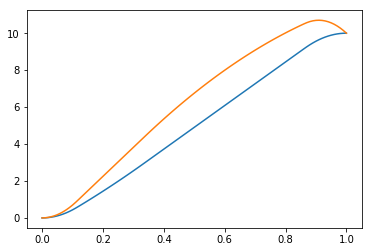

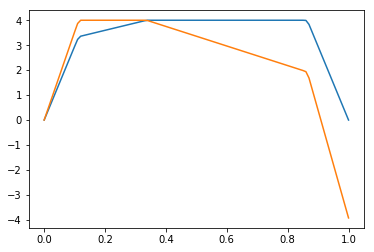

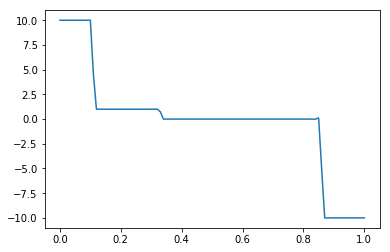

In [52]:
plt.plot(m.time, np.array(s_0))
plt.plot(m.time, np.array(s_9))
plt.show()

plt.plot(m.time, np.array(v_0))
plt.plot(m.time, np.array(v_9))
plt.show()

plt.plot(m.time, np.array(u))
plt.show()

[3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.9240282505, 3.924

In [15]:
s_9

[0.0, 0.0010611549895, 0.0042446200141, 0.0095503951742, 0.01697848047, 0.026528875901, 0.038201581468, 0.05199659717, 0.067913923007, 0.085953558981, 0.10611550509, 0.12839976133, 0.15280632771, 0.17933520423, 0.20798639088, 0.23875988767, 0.27165569459, 0.30667381165, 0.34381423884, 0.38307697617, 0.42446202363, 0.46796938123, 0.51359904896, 0.56135102684, 0.61122531484, 0.66322191298, 0.71734082126, 0.77358203967, 0.83194556822, 0.8924314069, 0.95503955572, 1.0197700147, 1.0866227838, 1.155597863, 1.2266952524, 1.2999149519, 1.3752569615, 1.4527212813, 1.5323079112, 1.6140168512, 1.6978481014, 1.7838016617, 1.8718775321, 1.9620757127, 2.0543962034, 2.1488390043, 2.2454041153, 2.3440915364, 2.4449012676, 2.547833309, 2.6528876606, 2.7600643222, 2.869363294, 2.980784576, 3.094328168, 3.2099940702, 3.3277822826, 3.4476928051, 3.5697256377, 3.6938807804, 3.8201582333, 3.9485579963, 4.0790800695, 4.2117244528, 4.3464911462, 4.4833801498, 4.6223914635, 4.7635250873, 4.9067810213, 5.052159

In [21]:
#m = GEKKO()
nr_points = 101
m = GEKKO()
m.time = np.linspace(0,1,nr_points) # scale 0-1 time with tf
# options
m.options.NODES = 6
m.options.SOLVER = 3
m.options.IMODE = 6
m.options.MAX_ITER = 500
m.options.MV_TYPE = 0
m.options.DIAGLEVEL = 0


tf_9 = m.FV(value=1.0,lb=0.1,ub=15) # final time
tf_9.STATUS = 1
u_9 = m.MV(value=10,lb=-10,ub=10) # force
u_9.STATUS = 1
u_9.DCOST = 1e-6
s_9 = m.Var(value=0,lb=0, ub=100) # variables
v_9 = m.Var(value=0,lb=-10,ub=4)
m.Equation(s_9.dt()==tf_9*v_9)
m.Equation(v_9.dt()==tf_9*(u - 9))
m.fix(s_9, pos=len(m.time)-1,val=10.0) # specify endpoint conditions
#m.Equation(s_9 * final>=10)

m.Minimize(tf_9)
m.solve()

apm 220.255.49.39_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            2
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           2899
 Number of total equations: -         2800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

In [23]:
s_9 * final

((v1)*(p1))

In [24]:
final

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]

In [25]:
s_9

[0.0, 0.0010611549895, 0.0042446200142, 0.0095503951744, 0.01697848047, 0.026528875901, 0.038201581468, 0.051996597171, 0.067913923009, 0.085953558982, 0.10611550509, 0.12839976134, 0.15280632772, 0.17933520423, 0.20798639088, 0.23875988767, 0.27165569459, 0.30667381165, 0.34381423884, 0.38307697617, 0.42446202364, 0.46796938124, 0.51359904897, 0.56135102684, 0.61122531485, 0.66322191299, 0.71734082127, 0.77358203968, 0.83194556823, 0.89243140692, 0.95503955574, 1.0197700147, 1.0866227838, 1.155597863, 1.2266952524, 1.2999149519, 1.3752569615, 1.4527212813, 1.5323079112, 1.6140168512, 1.6978481014, 1.7838016617, 1.8718775321, 1.9620757127, 2.0543962034, 2.1488390043, 2.2454041153, 2.3440915364, 2.4449012677, 2.5478333091, 2.6528876606, 2.7600643223, 2.8693632941, 2.980784576, 3.0943281681, 3.2099940703, 3.3277822826, 3.4476928051, 3.5697256377, 3.6938807805, 3.8201582333, 3.9485579964, 4.0790800695, 4.2117244528, 4.3464911462, 4.4833801498, 4.6223914635, 4.7635250873, 4.9067810213, 5.0

In [41]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()

nt = 101
tm = np.linspace(0,1,nt)
m.time = tm

s_9 = m.Var(value=0,lb=0, ub=100) # variables
v_9 = m.Var(value=0,lb=-10,ub=4)

#x1 = m.Var(value=np.pi/2.0)
#x2 = m.Var(value=4.0)
#x3 = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
p_less_10 = np.ones(nt) * 10
p_less_10[-1] = 0
final = m.Param(value=p)
position_bound = m.Param(value=p_less_10)

tf_9 = m.FV(value=1.0,lb=0.1,ub=100.0)
tf_9.STATUS = 1
m.Minimize(tf_9)

#u = m.MV(value=0,lb=-2,ub=2)
u_9 = m.MV(value=10,lb=-10,ub=10)
u_9.STATUS = 1

m.Equation(s_9.dt()==tf_9*v_9)
m.Equation(v_9.dt()==tf_9*(u_9 - 9))
#m.Equation(x3.dt()==m.sin(x1)*tf)

m.Equation(s_9*final + position_bound >=10.0)
m.Equation(v_9*final<=1e-8)

m.options.IMODE = 6
m.solve()


# Z = m.Var()
# m.Minimize(Z)
# m.Equations([Z>=x1,Z>=x2,Z>=x3])
# m.Maximize(x1)
# m.Maximize(x2)
# m.Maximize(x3)

# u = m.MV(value=0,lb=-2,ub=2)
# u.STATUS = 1

# m.Equation(x1.dt()==u*tf)
# m.Equation(x2.dt()==m.cos(x1)*tf)
# m.Equation(x3.dt()==m.sin(x1)*tf)

# m.Equation(x2*final<=0)
# m.Equation(x3*final<=0)

# m.options.IMODE = 6
# m.solve()

# print('Final Time: ' + str(tf.value[0]))

# tm = tm * tf.value[0]

# plt.figure(1)
# plt.plot(tm,x1.value,'k-',lw=2,label=r'$x_1$')
# plt.plot(tm,x2.value,'b-',lw=2,label=r'$x_2$')
# plt.plot(tm,x3.value,'g--',lw=2,label=r'$x_3$')
# plt.plot(tm,u.value,'r--',lw=2,label=r'$u$')
# plt.legend(loc='best')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.show()

apm 220.255.49.39_gk_model17 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            5
   Residuals    :            5
 
 Number of state variables:           1101
 Number of total equations: -         1000
 Number of slack variables: -          200
 ---------------------------------------
 Degrees of freedom       :            -99
 
 * Warning: DOF <= 0
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This

In [39]:
s_9

[0.0, 0.002122016689, 0.0063660500666, 0.012732100132, 0.021220166885, 0.031830250325, 0.044562350451, 0.059416467262, 0.076392600759, 0.09549075094, 0.1167109178, 0.14005310135, 0.16551730158, 0.19310351849, 0.22281175209, 0.25464200236, 0.28859426931, 0.32466855294, 0.36286485325, 0.40318317024, 0.4456235039, 0.49018585423, 0.53687022124, 0.58567660493, 0.63660500529, 0.68965542231, 0.74482785601, 0.80212230638, 0.86153877342, 0.92307725712, 0.98673775749, 1.0525202745, 1.1204248082, 1.1904513586, 1.2625999256, 1.3368705093, 1.4132631096, 1.4917777266, 1.5724143602, 1.6551730105, 1.7400536775, 1.8270563611, 1.9161810613, 2.0074277782, 2.1007965118, 2.1962872619, 2.2939000288, 2.3936348122, 2.4954916123, 2.599470429, 2.7055712624, 2.8137941123, 2.9241389789, 3.0366058621, 3.151194762, 3.2679056784, 3.3867386115, 3.5076935611, 3.6307705274, 3.7559695102, 3.8832905096, 4.0127335256, 4.1442985582, 4.2779856074, 4.4137946731, 4.5517257554, 4.6917788543, 4.8339539696, 4.9782511015, 5.12467

In [40]:
v_9

[0.0, 0.046065354178, 0.092130708344, 0.1381960625, 0.18426141664, 0.23032677077, 0.27639212489, 0.32245747899, 0.36852283308, 0.41458818716, 0.46065354122, 0.50671889527, 0.5527842493, 0.59884960332, 0.64491495732, 0.6909803113, 0.73704566527, 0.78311101922, 0.82917637315, 0.87524172707, 0.92130708097, 0.96737243484, 1.0134377887, 1.0595031425, 1.1055684964, 1.1516338501, 1.1976992039, 1.2437645577, 1.2898299114, 1.3358952651, 1.3819606188, 1.4280259724, 1.474091326, 1.5201566796, 1.5662220332, 1.6122873867, 1.6583527402, 1.7044180937, 1.7504834471, 1.7965488005, 1.8426141538, 1.8886795072, 1.9347448604, 1.9808102137, 2.0268755668, 2.07294092, 2.1190062731, 2.1650716261, 2.2111369791, 2.257202332, 2.3032676849, 2.3493330377, 2.3953983904, 2.4414637431, 2.4875290956, 2.5335944481, 2.5796598006, 2.6257251529, 2.6717905051, 2.7178558572, 2.7639212092, 2.8099865611, 2.8560519129, 2.9021172645, 2.9481826159, 2.9942479672, 3.0403133183, 3.0863786692, 3.1324440199, 3.1785093703, 3.2245747205